In [5]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def sigmoid(h):
    return 1./(1 + np.exp(-h))  # h - гипотеза

def logit(x, w):
    return np.dot(x, w)  # x - наши данные, w - параметры

def generate_batches(X, y, batch_size):
    assert len(X) == len(y)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))
    for i in range(len(X)//batch_size):
        idx = perm[batch_size*i:batch_size*(i+1)]
        yield (X[idx], y[idx])

In [19]:
class LogisticRegression(object):
    def __init__(self, l1_coef, l2_coef):
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef
        self.w = None

    def fit(self, X, y, epochs=10, lr=0.01, batch_size=100):
        measure, features = X.shape
        if self.w is None:
            # нарандомили наши параметры
            self.w = np.random.randn(features + 1)
        # добавили колонку с единицами
        X_train = np.concatenate((np.ones((measure, 1)), X), axis=1)

        losses = []  # будем сохранять для каждой эпохи список значений cost function
        for i in range(epochs):
            z = sigmoid(logit(X_train, self.w))
            for X_batch, y_batch in generate_batches(X_train, y, batch_size):
                losses.append(self.__loss(y, z))
                y_pred=sigmoid(logit(X_batch, self.w))
                self.w -= lr * self.get_grad(X_batch, y_batch,y_pred)
        return losses

    def get_grad(self, X_batch, y_batch,y_pred):
        
        wc = np.copy(self.w)  # скопировали наши параметры
        # чтобы изменить первый параметр на 0 и регулизация не применилась к bias feature
        wc[0] = 0

        grad = np.dot(X_batch.T, (y_pred - y_batch))/len(y_batch)

        # Norms
        l1 = self.l1_coef*np.sign(wc)
        l2 = 2 * self.l2_coef * np.eye(wc.shape[0]) @ wc

        return grad + l1 + l2

    def predict_proba(self, X):
        measure, features = X.shape
        X_ = np.concatenate((np.ones((measure, 1)), X), axis=1)
        return sigmoid(logit(X_, self.w))

    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold

    def get_weights(self):
        return self.w

    def __loss(self, y, h):
        h = np.clip(h, 1e-10, 1 - 1e-10)
        return -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))

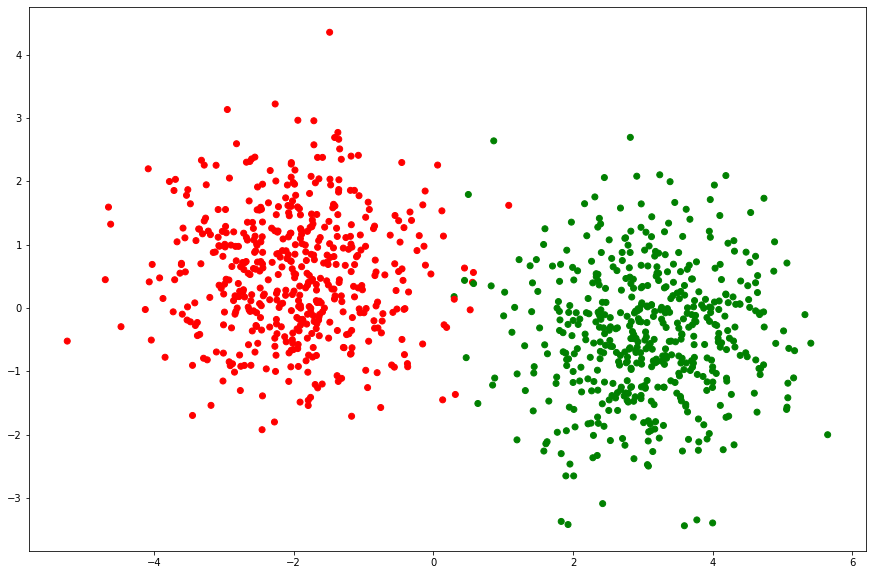

In [24]:
X, y = make_blobs(n_samples=1000, centers=[
                  [-2, 0.5], [3, -0.5]], cluster_std=1, random_state=42)

colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0, 1]):
    colored_y[y == cl] = str(colors[i])

plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

clf = LogisticRegression(0.1, 0.1)
clf.fit(X, y, epochs=1000)
w = clf.get_weights()

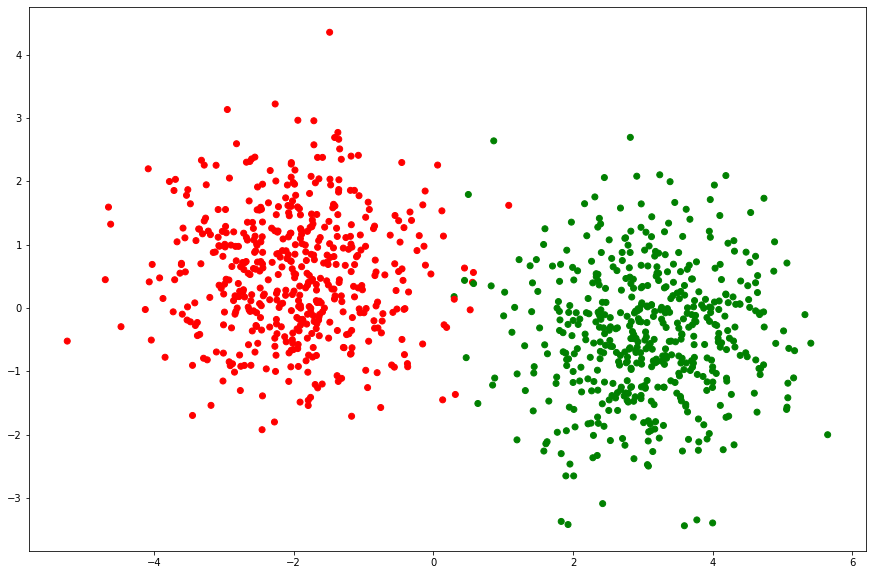

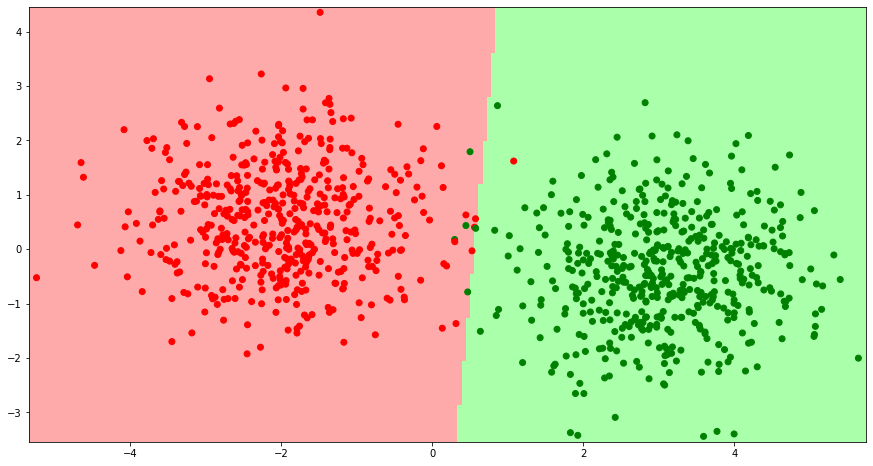

In [25]:
X, y = make_blobs(n_samples=1000, centers=[
                  [-2, 0.5], [3, -0.5]], cluster_std=1, random_state=42)

colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0, 1]):
    colored_y[y == cl] = str(colors[i])

plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

clf = LogisticRegression(0.01, 0.01)
clf.fit(X, y, epochs=5000)
w = clf.get_weights()

from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 200),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)

In [28]:
from sklearn.metrics import accuracy_score
y_pred=clf.predict(X)
accuracy_score(y, y_pred)

0.995